A frame with the name 'BPL' is already registered. Overriding


                Time                      Azim    Elev    Distance   Radial Velocity
AOS     2023-06-15T19:59:22.818542 UTC  176.82    0.00    2327.44   -5264.31
        2023-06-15T19:59:22.963664 UTC  176.81    0.01    2326.68   -5263.02
        2023-06-15T19:59:52.963664 UTC  173.02    1.44    2173.10   -4964.20
        2023-06-15T20:00:22.963664 UTC  168.66    2.89    2029.57   -4590.86
        2023-06-15T20:00:52.963664 UTC  163.65    4.31    1898.55   -4127.47
        2023-06-15T20:01:22.963664 UTC  157.92    5.68    1782.97   -3558.97
        2023-06-15T20:01:52.963664 UTC  151.43    6.92    1686.17   -2874.63
        2023-06-15T20:02:22.963664 UTC  144.20    7.94    1611.67   -2073.97
        2023-06-15T20:02:52.963664 UTC  136.36    8.65    1562.74   -1173.23
        2023-06-15T20:03:22.963664 UTC  128.14    8.97    1541.92    -208.51
MAX     2023-06-15T20:03:29.984934 UTC  126.20    8.98    1541.26      21.14
        2023-06-15T20:03:52.963664 UTC  119.85    8.85    1550.36   

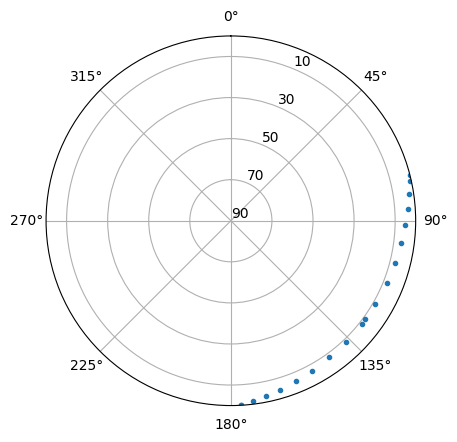

2023-06-15T19:11:23.709663 UTC
BPL


In [2]:

import sys
import numpy as np
import matplotlib.pyplot as plt

from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.config import config


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

# Station definition
station = create_station('BPL', ( 37.8059,144.9514, 0))
azims, elevs = [], []

print("                Time                      Azim    Elev    Distance   Radial Velocity")
print("====================================================================================")

for orb in station.visibility(tle, start=Date.now(), stop=timedelta(hours=24), step=timedelta(seconds=30), events=True):
    elev = np.degrees(orb.phi)
    # Radians are counterclockwise and azimuth is clockwise
    azim = np.degrees(-orb.theta) % 360

    # Archive for plotting
    azims.append(azim)
    # Matplotlib actually force 0 to be at the center of the polar plot,
    # so we trick it by inverting the values
    elevs.append(90 - elev)

    r = orb.r / 1000.
    print("{event:7} {orb.date} {azim:7.2f} {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
        orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
    ))

    if orb.event and orb.event.info.startswith("LOS"):
        # We stop at the end of the first pass
        print()
        break

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.plot(np.radians(azims), elevs, '.')
ax.set_yticks(range(0, 90, 20))
ax.set_yticklabels(map(str, range(90, 0, -20)))
ax.set_rmax(90)

if "no-display" not in sys.argv:
    plt.show()
    print(Date.now())
    print(station)
     

A frame with the name 'BPL' is already registered. Overriding


AOS      2023-06-18T00:32:27.636087 UTC   239.12     0.00    2330.67   -6606.63
MAX      2023-06-18T00:37:38.437459 UTC   313.69    29.19     777.05       2.31
LOS      2023-06-18T00:42:49.955946 UTC    28.45    -0.00    2333.24    6590.36


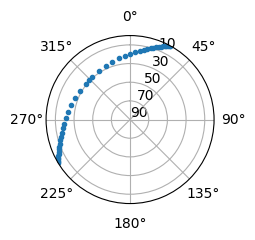

AOS      2023-06-18T02:13:46.126311 UTC   313.42     0.00    2333.14   -1621.68
MAX      2023-06-18T02:15:07.428385 UTC   328.27     0.61    2266.27       0.81
LOS      2023-06-18T02:16:28.799941 UTC   343.13    -0.00    2333.27    1620.58


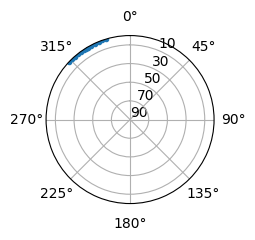

AOS      2023-06-18T07:10:28.662258 UTC     9.08     0.00    2332.66   -2602.05
MAX      2023-06-18T07:12:38.488993 UTC    33.19     1.64    2156.60      -2.07
LOS      2023-06-18T07:14:48.127880 UTC    57.28    -0.00    2332.11    2605.15


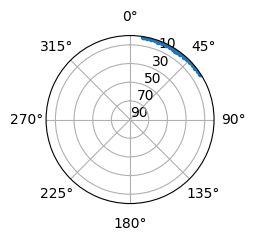

AOS      2023-06-18T08:44:44.223334 UTC   328.74     0.00    2332.49   -6721.92
MAX      2023-06-18T08:50:00.738455 UTC    47.29    37.02     651.96      -2.54
LOS      2023-06-18T08:55:16.499929 UTC   125.63    -0.00    2329.24    6735.66


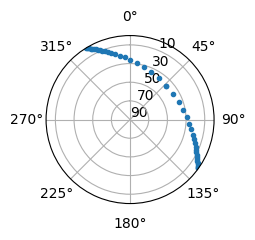

AOS      2023-06-18T10:22:11.611694 UTC   287.92     0.00    2331.62   -5345.10
MAX      2023-06-18T10:26:22.211904 UTC   236.45     9.33    1514.60      -7.30
LOS      2023-06-18T10:30:33.047397 UTC   184.80    -0.00    2327.59    5315.15


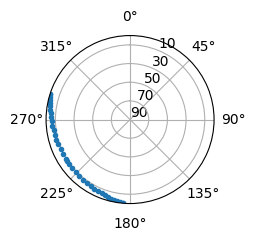

AOS      2023-06-18T22:08:57.173718 UTC   160.39     0.00    2329.52   -4118.92
MAX      2023-06-18T22:12:13.631554 UTC   122.32     4.54    1880.16       7.74
LOS      2023-06-18T22:15:29.814236 UTC    84.37    -0.00    2332.64    4147.61


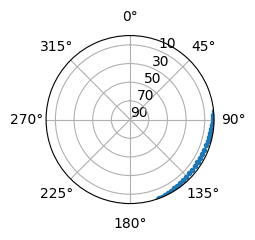

AOS      2023-06-18T23:43:05.712382 UTC   224.26     0.00    2330.42   -6897.42
MAX      2023-06-18T23:48:27.960362 UTC   310.72    67.26     445.40       1.64
LOS      2023-06-18T23:53:50.765089 UTC    37.41    -0.00    2333.44    6891.23


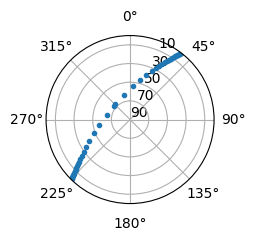

In [17]:
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
 
import sys
import numpy as np
import matplotlib.pyplot as plt

tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()
azims, elevs = [], []
#print(repr(tle))

station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 


# checkAOS = StationSignalListener(station,0).info(tle)
# print(checkAOS)
# check = StationMaskListener(station=station).check(tle)
# print(check)
 

for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=24), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    

    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        print("{event:7}  {orb.date}  {azim:7.2f}  {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
        orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    if orb.event and orb.event.info.startswith("LOS"):
        plt.figure()
        ax = plt.subplot(223, projection='polar')   
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        plt.plot(np.radians(azims), elevs, '.')
        ax.set_yticks(range(0, 90, 20))
        ax.set_yticklabels(map(str, range(90, 0, -20)))
        ax.set_rmax(90)   
        
        if "no-display" not in sys.argv:
            plt.show()
        
        azims.clear()
        elevs.clear()
        

        
        

# plt.figure()
# ax = plt.subplot(111, projection='polar')
# ax.set_theta_direction(-1)
# ax.set_theta_zero_location('N')
# plt.plot(np.radians(azims), elevs, '.')
# ax.set_yticks(range(0, 90, 20))
# ax.set_yticklabels(map(str, range(90, 0, -20)))
# ax.set_rmax(90)

# if "no-display" not in sys.argv:
#     plt.show()
 

In [32]:
from beyond.dates import Date, timedelta
print(Date.now())
print(timedelta(hours=24))
print(Date(2023, 6, 18, 00, 00, 00) )

2023-06-15T20:10:53.416492 UTC
1 day, 0:00:00
2023-06-18T00:00:00 UTC


In [19]:
from datetime import datetime
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal

local_timezone = tzlocal.get_localzone() # get pytz tzinfo
utc_time = datetime.strptime("2011-01-21 02:37:21", "%Y-%m-%d %H:%M:%S")
local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)

print(utc_time , local_time)

2011-01-21 02:37:21 2011-01-21 08:07:21+05:30


In [34]:
 
import sys
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

azims, elevs = [], []
 
local_timezone = tzlocal.get_localzone() 

 
station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 
for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=2), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    
    if orb.event and orb.event.info.startswith('AOS') :
        
        print("         Date         Time          Azim      Elev      Distance   Radial Velocity")
        print("==================================================================================") 

    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        
        
        str1 = orb.date.strftime("%m/%d/%Y  %H:%M:%S")
        utc_time = datetime.strptime(str1 , "%m/%d/%Y  %H:%M:%S")
        local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)
          
        _date = local_time.strftime("%m/%d/%Y")
        _time = local_time.strftime("%H:%M:%S")
          
        
        print("{event:7} | {date} | {time}  | {azim:7.2f} | {elev:7.2f} | {r:10.2f} | {orb.r_dot:10.2f}".format(
        orb=orb, r=r, date = _date , time = _time,azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    if orb.event and orb.event.info.startswith("LOS"):
       
        pass

        

A frame with the name 'BPL' is already registered. Overriding


         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 06:02:27  |  239.12 |    0.00 |    2330.67 |   -6606.63
MAX     | 06/18/2023 | 06:07:38  |  313.69 |   29.19 |     777.05 |       2.31
LOS     | 06/18/2023 | 06:12:49  |   28.45 |   -0.00 |    2333.24 |    6590.36


In [47]:
import sys
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station

tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

azims, elevs = [], []
local_timezone = tzlocal.get_localzone() 
station = create_station('BPL', (0.9102, 90.9955, 100))
counter = 0 
predictedpath = []
 
for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=2), step=timedelta(seconds=15), events=(True)):
    counter=counter+1
    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
     
    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        
        
        str1 = orb.date.strftime("%m/%d/%Y  %H:%M:%S")
        utc_time = datetime.strptime(str1 , "%m/%d/%Y  %H:%M:%S")
        local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)
          
        _date = local_time.strftime("%m/%d/%Y")
        _time = local_time.strftime("%H:%M:%S")
        
        path = {
            "_id" : counter [
                "event" : orb.event.info,
                "date" : _date ,
                "time" : _time , 
                "azi" : azim, 
                "elev" : elev
            ]           
        }

        predictedpath.append(path)
        
        print("{event:7} | {date} | {time}  | {azim:7.2f} | {elev:7.2f} | {r:10.2f} | {orb.r_dot:10.2f}".format(
        orb=orb, r=r, date = _date , time = _time,azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    # if orb.event and orb.event.info.startswith("LOS"):
       
    #     pass
print(predictedpath)

A frame with the name 'BPL' is already registered. Overriding


[]


A frame with the name 'BPL' is already registered. Overriding


         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/16/2023 | 06:02:54   |  216.61 |    0.00 |    2330.12 |   -6918.29
MAX     | 06/16/2023 | 06:08:16   |  128.17 |   82.57 |     415.73 |       0.31
LOS     | 06/16/2023 | 06:13:39   |   39.98 |   -0.00 |    2330.86 |    6918.83


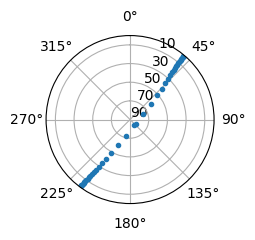

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/16/2023 | 07:41:49   |  279.15 |    0.00 |    2331.11 |   -4209.40
MAX     | 06/16/2023 | 07:45:14   |  319.13 |    4.91 |    1848.19 |      -1.33
LOS     | 06/16/2023 | 07:48:39   |  359.21 |   -0.00 |    2330.62 |    4190.81


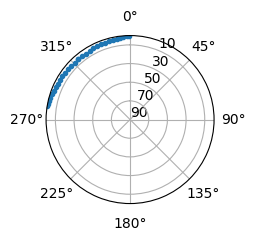

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/16/2023 | 14:18:15   |  358.28 |    0.00 |    2331.38 |   -4479.73
MAX     | 06/16/2023 | 14:21:54   |   41.53 |    5.85 |    1771.02 |       2.23
LOS     | 06/16/2023 | 14:25:33   |   84.67 |   -0.00 |    2332.31 |    4500.83


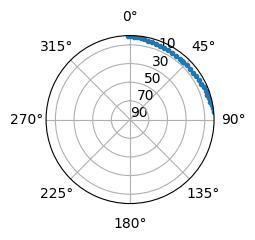

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/16/2023 | 15:53:27   |  318.14 |    0.00 |    2331.79 |   -6908.48
MAX     | 06/16/2023 | 15:58:49   |  232.22 |   69.63 |     438.58 |      -0.12
LOS     | 06/16/2023 | 16:04:11   |  146.06 |   -0.00 |    2331.39 |    6905.12


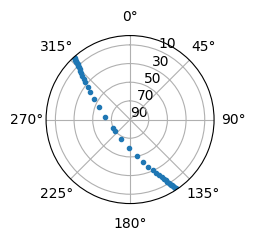

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/16/2023 | 17:33:52   |  250.97 |    0.00 |    2332.03 |   -1448.63
MAX     | 06/16/2023 | 17:35:02   |  238.27 |    0.46 |    2280.89 |      -3.35
LOS     | 06/16/2023 | 17:36:11   |  225.55 |   -0.00 |    2331.57 |    1439.22


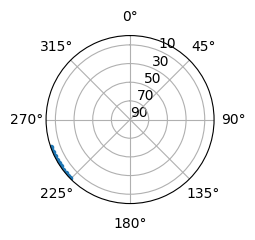

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/17/2023 | 05:14:02   |  201.51 |    0.00 |    2330.31 |   -6680.04
MAX     | 06/17/2023 | 05:19:14   |  126.10 |   32.17 |     722.98 |       0.72
LOS     | 06/17/2023 | 05:24:25   |   50.92 |   -0.00 |    2331.24 |    6695.17


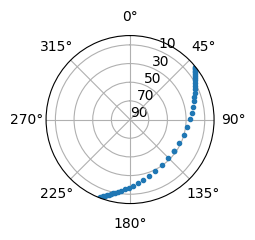

In [44]:
import sys 
import pytz    
import tzlocal  
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

azims, elevs = [], []  
local_timezone = tzlocal.get_localzone() 
station = create_station('BPL', (19.50, 76.2155, 495.23))
station2 = create_station('ISL', (0.9102, 90.9955, 100))

for orb in station2.visibility(tle, start=Date(2023, 6, 16, 00, 00, 00), stop=timedelta(hours=24), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    
    if orb.event and orb.event.info.startswith('AOS') :
        
        print("         Date         Time          Azim      Elev      Distance   Radial Velocity")
        print("==================================================================================") 
    
    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        
        str1 = orb.date.strftime("%m/%d/%Y  %H:%M:%S")
        utc_time = datetime.strptime(str1 , "%m/%d/%Y  %H:%M:%S")
        local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)
          
        _date = local_time.strftime("%m/%d/%Y")
        _time = local_time.strftime("%H:%M:%S")        
    

        print("{event:7} | {date} | {time}   | {azim:7.2f} | {elev:7.2f} | {r:10.2f} | {orb.r_dot:10.2f}".format(
        orb=orb, r=r,date = _date , time = _time, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    if orb.event and orb.event.info.startswith("LOS"):
        plt.figure()
        ax = plt.subplot(224, projection='polar')   
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        plt.plot(np.radians(azims), elevs, '.')
        ax.set_yticks(range(0, 90, 20))
        ax.set_yticklabels(map(str, range(90, 0, -20)))
        ax.set_rmax(90)   
        
        if "no-display" not in sys.argv:
            plt.show()
        azims.clear()
        elevs.clear()

        pass
        print("                     ")
        print("                     ") 
        

A frame with the name 'BPL' is already registered. Overriding


         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 06:02:27   |  239.12 |    0.00 |    2330.67 |   -6606.63
        | 06/18/2023 | 06:02:30   |  239.25 |    0.14 |    2315.06 |   -6602.41
        | 06/18/2023 | 06:02:45   |  240.10 |    1.06 |    2216.24 |   -6572.56
        | 06/18/2023 | 06:03:00   |  241.04 |    2.01 |    2117.91 |   -6536.62
        | 06/18/2023 | 06:03:15   |  242.06 |    3.01 |    2020.18 |   -6493.51
        | 06/18/2023 | 06:03:30   |  243.19 |    4.06 |    1923.15 |   -6441.90
        | 06/18/2023 | 06:03:45   |  244.44 |    5.16 |    1826.97 |   -6380.11
        | 06/18/2023 | 06:04:00   |  245.83 |    6.33 |    1731.81 |   -6306.03
        | 06/18/2023 | 06:04:15   |  247.39 |    7.57 |    1637.86 |   -6217.00
        | 06/18/2023 | 06:04:30   |  249.14 |    8.89 |    1545.39 |   -6109.65
        | 06/18/2023 | 06:04:45   |  251.12 |   10.30 |    1454.69 |   -5979.71
        | 06/18/2023 | 06:05:00   |  

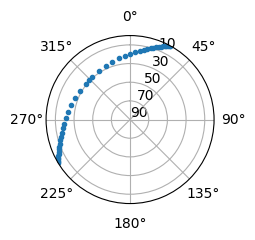

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 07:43:46   |  313.42 |    0.00 |    2333.14 |   -1621.68
        | 06/18/2023 | 07:44:00   |  315.88 |    0.19 |    2312.47 |   -1357.09
        | 06/18/2023 | 07:44:15   |  318.58 |    0.35 |    2294.30 |   -1063.49
        | 06/18/2023 | 07:44:30   |  321.33 |    0.48 |    2280.59 |    -763.58
        | 06/18/2023 | 07:44:45   |  324.10 |    0.56 |    2271.42 |    -459.07
        | 06/18/2023 | 07:45:00   |  326.89 |    0.60 |    2266.83 |    -151.79
MAX     | 06/18/2023 | 07:45:07   |  328.27 |    0.61 |    2266.27 |       0.81
        | 06/18/2023 | 07:45:15   |  329.68 |    0.60 |    2266.87 |     156.31
        | 06/18/2023 | 07:45:30   |  332.47 |    0.56 |    2271.52 |     463.28
        | 06/18/2023 | 07:45:45   |  335.24 |    0.48 |    2280.75 |     767.19
        | 06/18/2023 | 07:46:00   |  337.98 |    0.35 |    2294.51 |    1

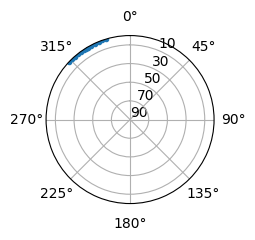

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 12:40:28   |    9.08 |    0.00 |    2332.66 |   -2602.05
        | 06/18/2023 | 12:40:30   |    9.30 |    0.03 |    2329.20 |   -2579.31
        | 06/18/2023 | 12:40:45   |   11.86 |    0.36 |    2292.46 |   -2317.06
        | 06/18/2023 | 12:41:00   |   14.50 |    0.66 |    2259.75 |   -2041.88
        | 06/18/2023 | 12:41:15   |   17.22 |    0.93 |    2231.26 |   -1754.61
        | 06/18/2023 | 12:41:30   |   19.99 |    1.16 |    2207.17 |   -1456.40
        | 06/18/2023 | 12:41:45   |   22.82 |    1.34 |    2187.62 |   -1148.70
        | 06/18/2023 | 12:42:00   |   25.70 |    1.49 |    2172.74 |    -833.21
        | 06/18/2023 | 12:42:15   |   28.60 |    1.58 |    2162.65 |    -511.87
        | 06/18/2023 | 12:42:30   |   31.53 |    1.64 |    2157.41 |    -186.82
MAX     | 06/18/2023 | 12:42:38   |   33.19 |    1.64 |    2156.60 |     

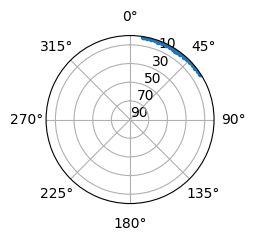

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 14:14:44   |  328.74 |    0.00 |    2332.49 |   -6721.92
        | 06/18/2023 | 14:14:45   |  328.78 |    0.05 |    2327.27 |   -6721.15
        | 06/18/2023 | 14:15:00   |  329.45 |    0.97 |    2226.58 |   -6704.23
        | 06/18/2023 | 14:15:15   |  330.18 |    1.94 |    2126.17 |   -6682.88
        | 06/18/2023 | 14:15:30   |  330.98 |    2.96 |    2026.12 |   -6656.32
        | 06/18/2023 | 14:15:45   |  331.86 |    4.03 |    1926.51 |   -6623.54
        | 06/18/2023 | 14:16:00   |  332.84 |    5.17 |    1827.45 |   -6583.31
        | 06/18/2023 | 14:16:15   |  333.92 |    6.37 |    1729.06 |   -6534.02
        | 06/18/2023 | 14:16:30   |  335.14 |    7.67 |    1631.48 |   -6473.61
        | 06/18/2023 | 14:16:45   |  336.51 |    9.05 |    1534.92 |   -6399.41
        | 06/18/2023 | 14:17:00   |  338.08 |   10.56 |    1439.59 |   -6

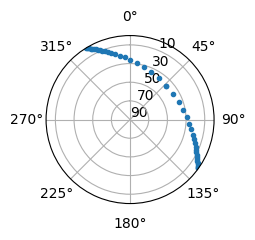

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 15:52:11   |  287.92 |    0.00 |    2331.62 |   -5345.10
        | 06/18/2023 | 15:52:15   |  287.52 |    0.16 |    2313.55 |   -5315.64
        | 06/18/2023 | 15:52:30   |  285.71 |    0.89 |    2234.85 |   -5175.77
        | 06/18/2023 | 15:52:45   |  283.76 |    1.62 |    2158.37 |   -5019.18
        | 06/18/2023 | 15:53:00   |  281.66 |    2.35 |    2084.37 |   -4844.03
        | 06/18/2023 | 15:53:15   |  279.41 |    3.08 |    2013.15 |   -4648.35
        | 06/18/2023 | 15:53:30   |  277.00 |    3.81 |    1945.03 |   -4430.07
        | 06/18/2023 | 15:53:45   |  274.40 |    4.54 |    1880.37 |   -4187.14
        | 06/18/2023 | 15:54:00   |  271.62 |    5.25 |    1819.55 |   -3917.61
        | 06/18/2023 | 15:54:15   |  268.65 |    5.93 |    1762.98 |   -3619.74
        | 06/18/2023 | 15:54:30   |  265.48 |    6.59 |    1711.10 |   -3

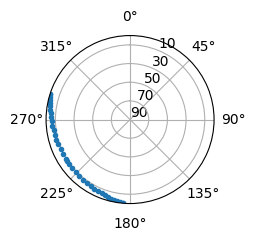

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/19/2023 | 03:38:57   |  160.39 |    0.00 |    2329.52 |   -4118.92
        | 06/19/2023 | 03:39:00   |  159.98 |    0.10 |    2317.94 |   -4080.97
        | 06/19/2023 | 03:39:15   |  157.71 |    0.65 |    2258.29 |   -3869.13
        | 06/19/2023 | 03:39:30   |  155.33 |    1.18 |    2201.95 |   -3639.06
        | 06/19/2023 | 03:39:45   |  152.82 |    1.69 |    2149.21 |   -3390.04
        | 06/19/2023 | 03:40:00   |  150.19 |    2.18 |    2100.35 |   -3121.59
        | 06/19/2023 | 03:40:15   |  147.44 |    2.63 |    2055.66 |   -2833.53
        | 06/19/2023 | 03:40:30   |  144.57 |    3.05 |    2015.44 |   -2526.08
        | 06/19/2023 | 03:40:45   |  141.58 |    3.43 |    1979.97 |   -2199.93
        | 06/19/2023 | 03:41:00   |  138.50 |    3.76 |    1949.53 |   -1856.27
        | 06/19/2023 | 03:41:15   |  135.32 |    4.04 |    1924.36 |   -1

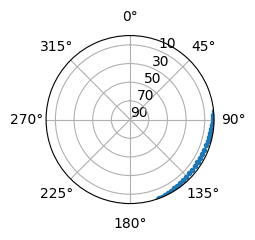

                     
                     
         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/19/2023 | 05:13:05   |  224.26 |    0.00 |    2330.42 |   -6897.42
        | 06/19/2023 | 05:13:15   |  224.39 |    0.58 |    2266.36 |   -6895.95
        | 06/19/2023 | 05:13:30   |  224.63 |    1.56 |    2162.95 |   -6891.73
        | 06/19/2023 | 05:13:45   |  224.89 |    2.60 |    2059.63 |   -6884.89
        | 06/19/2023 | 05:14:00   |  225.18 |    3.69 |    1956.42 |   -6874.96
        | 06/19/2023 | 05:14:15   |  225.50 |    4.85 |    1853.40 |   -6861.35
        | 06/19/2023 | 05:14:30   |  225.86 |    6.09 |    1750.60 |   -6843.30
        | 06/19/2023 | 05:14:45   |  226.26 |    7.43 |    1648.12 |   -6819.78
        | 06/19/2023 | 05:15:00   |  226.71 |    8.88 |    1546.05 |   -6789.46
        | 06/19/2023 | 05:15:15   |  227.23 |   10.47 |    1444.48 |   -6750.51
        | 06/19/2023 | 05:15:30   |  227.84 |   12.23 |    1343.59 |   -6

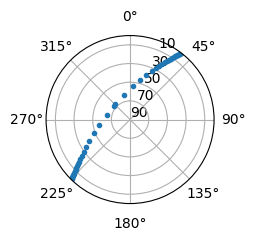

In [45]:
 
import sys
 
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

azims, elevs = [], []
 
  
local_timezone = tzlocal.get_localzone() 



station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 
for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=24), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    
    if orb.event and orb.event.info.startswith('AOS') :
        
        print("         Date         Time          Azim      Elev      Distance   Radial Velocity")
        print("==================================================================================") 
    
    # if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        
    str1 = orb.date.strftime("%m/%d/%Y  %H:%M:%S")
    utc_time = datetime.strptime(str1 , "%m/%d/%Y  %H:%M:%S")
    local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)
        
    _date = local_time.strftime("%m/%d/%Y")
    _time = local_time.strftime("%H:%M:%S")
    


    print("{event:7} | {date} | {time}   | {azim:7.2f} | {elev:7.2f} | {r:10.2f} | {orb.r_dot:10.2f}".format(
    orb=orb, r=r,date = _date , time = _time, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
    ))
      
    if orb.event and orb.event.info.startswith("LOS"):
        plt.figure()
        ax = plt.subplot(224, projection='polar')   
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        plt.plot(np.radians(azims), elevs, '.')
        ax.set_yticks(range(0, 90, 20))
        ax.set_yticklabels(map(str, range(90, 0, -20)))
        ax.set_rmax(90)   
        
        if "no-display" not in sys.argv:
            plt.show()
        azims.clear()
        elevs.clear()

        pass
        print("                     ")
        print("                     ") 
        